In [1]:
import torch
import sys
sys.path.append('../')
from DataType.ElectricField import ElectricField
#from Components.Hologram_v2 import HologramElement
from Props.RayleighSommerfeld import RSCPropagator as RSC_prop
from Props.RayleighSommerfeld import BluesteinRSCPropagator
from utils.Helper_Functions import normalize
import numpy as np
import scipy.io
import time
import torch.nn as nn
from utils.units import *
torch.__version__

'2.5.0a0+872d972e41.nv24.08'

In [2]:
from DataType.ElectricField import ElectricField
# ElectricFields are 4D objects: 
# B x C x H x W
# BATCH x Channel (Wavelength) x Height x Width

N = 512
field_data = torch.zeros(1,5,N,N) + 0j # 0j to make it complex

# Set ones to the field
field_data[...,N//4 : 3 * N//4, N//4 : 3 * N//4] = 1

# Cast into our Datatype
field_input = ElectricField(
    data = field_data, 
    wavelengths = [600 * nm, 660 * nm, 720 * nm, 760 * nm, 800 * nm],
    spacing = 4 * um,
)

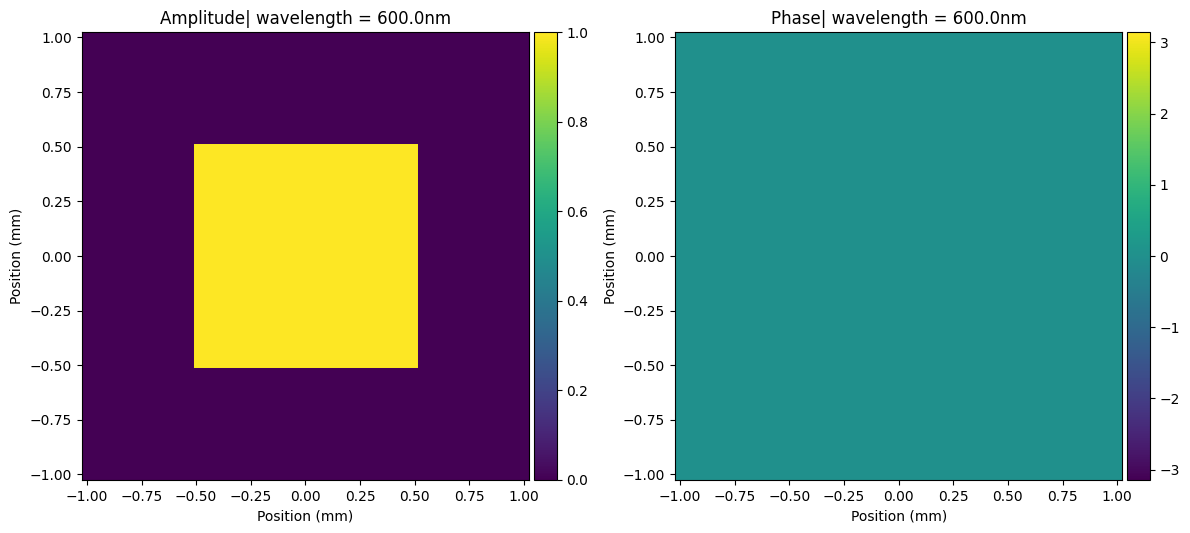

In [3]:
field_input.visualize(figsize=(12, 12), wavelength=600 * nm, flag_axis=True, intensity=False)

In [4]:
rsc_prop = RSC_prop(z_distance=300 * mm)

In [5]:
import time
 
# record start time
start = time.time()

field_propagated_rsc = rsc_prop.forward(
    field = field_input
)

# record end time
end = time.time()

# print the difference between start 
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

Minimum propagation distance to satisfy energy conservation: 27.179 mm
Minimum propagation distance to satisfy sampling for FT: 27.230 mm
The simulation will be accurate !
The time of execution of above program is : 181.8082332611084 ms


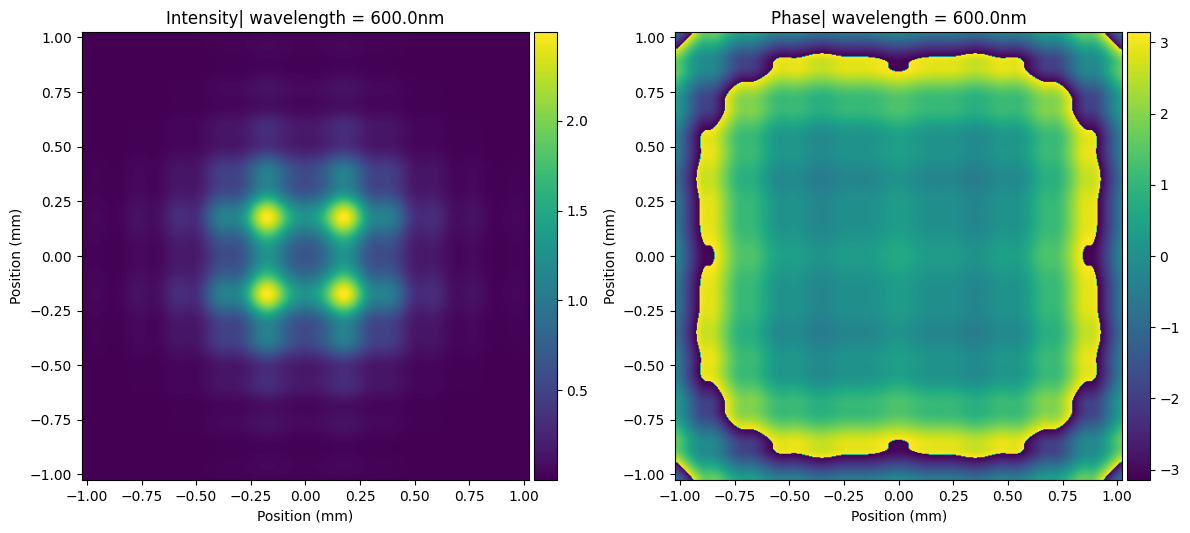

In [6]:
field_propagated_rsc.visualize(figsize=(12, 12), wavelength=600*nm,flag_axis=True, intensity=True)

In [7]:
czt_prop = BluesteinRSCPropagator(z_distance=300 * mm)

In [8]:
import time
 
# record start time
start = time.time()

field_propagated_czt = czt_prop.forward(
    field = field_input
)


# record end time
end = time.time()
 
# print the difference between start 
# and end time in milli. secs
print("The time of execution of above program is :",
      (end-start) * 10**3, "ms")

The time of execution of above program is : 94.36416625976562 ms


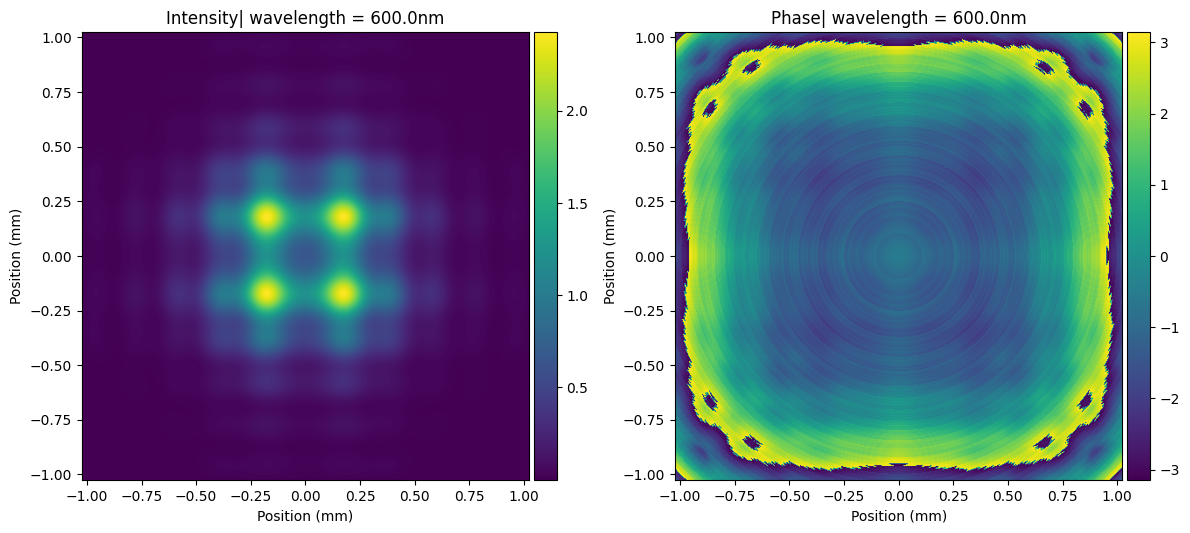

In [9]:
field_propagated_czt.visualize(figsize=(12, 12), wavelength=600*nm,flag_axis=True, intensity=True)

In [10]:
from Props.Fresnel import BasicFresnelPropagator, BluesteinFresnelPropagator

In [11]:
prop = BasicFresnelPropagator(z_distance=300 * mm, type='ir')

In [12]:
field_propagated_fresnel = prop.forward(
    field = field_input
)

minimum propagation distance to satisfy sampling for FT: 13.653 mm
The simulation will be accurate !


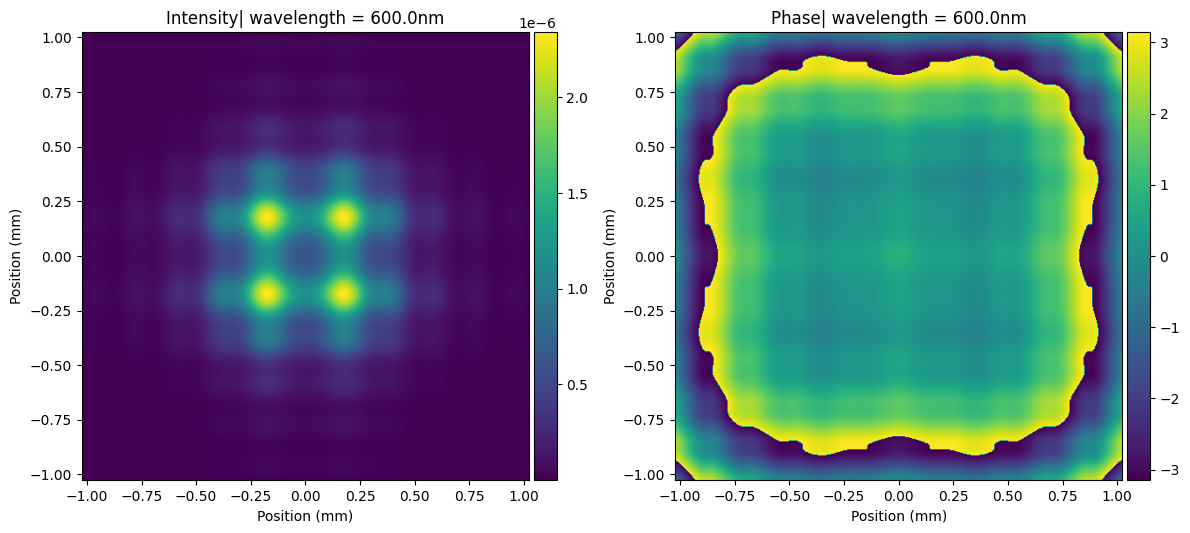

In [13]:
field_propagated_fresnel.visualize(figsize=(12, 12), wavelength=600*nm,flag_axis=True, intensity=True)

In [14]:
prop = BluesteinFresnelPropagator(z_distance=300 * mm)

In [15]:
field_propagated_czt = prop.forward(
    field = field_input,
    outputHeight=512,
	outputWidth=512, 						
	outputPixel_dx=2*um, 
	outputPixel_dy=2*um,
)

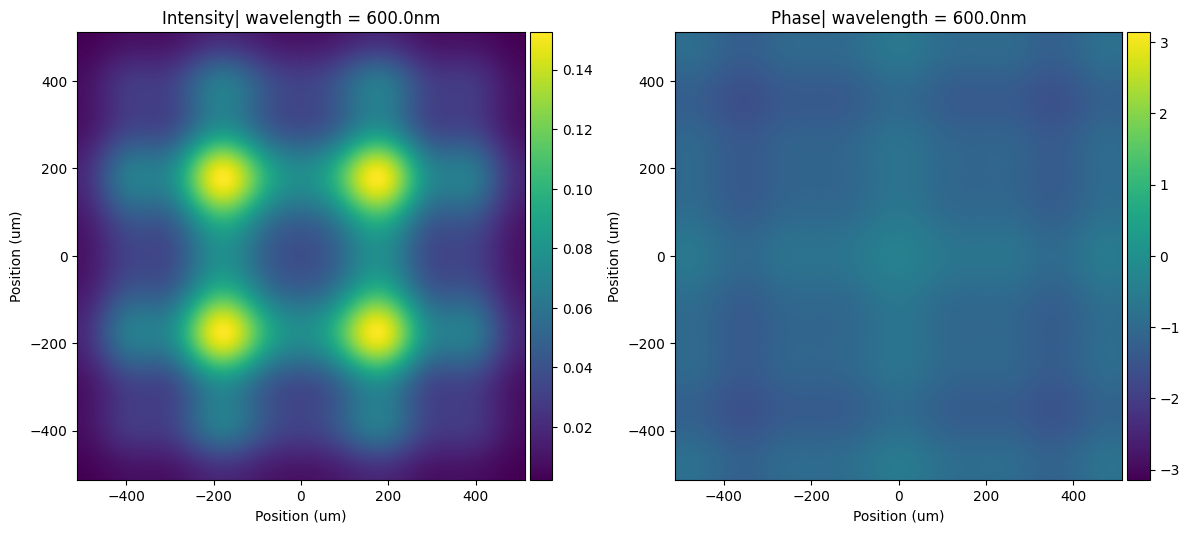

In [16]:
field_propagated_czt.visualize(figsize=(12, 12), wavelength=600*nm,flag_axis=True, intensity=True)

In [17]:
N = 512
field_data = torch.zeros(1,1,N,N) + 0j # 0j to make it complex

# Set ones to the field
field_data[...,N//4 : 3 * N//4, N//4 : 3 * N//4] = 1

field_input = ElectricField(
    data = field_data, 
    wavelengths = 1 * mm,
    spacing = 1 * mm,
)

In [18]:
from Props.ASM_Prop import ASM_prop

asm_prop = ASM_prop(z_distance=600 * mm, 
                    bandlimit_type='exact', 
                    padding_scale=2, 
                    bandlimit_kernel=True)

# Cast data into datatype 
field_propagated = asm_prop.forward(
    field = field_input
)

The critical distance is [1.3302151] m, the TF will be fine during the sampling !


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3593.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


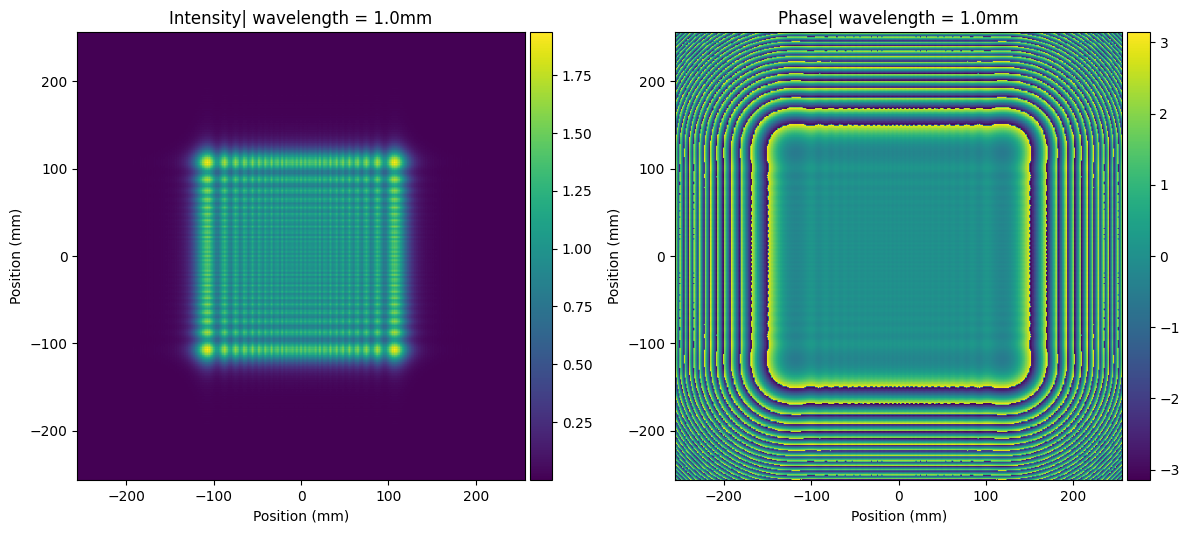

In [19]:
field_propagated.visualize(figsize=(12, 12), wavelength=1 * mm, flag_axis=True, intensity=True)

In [20]:
from Props.AngularSpectrum import ASMPropagator

In [21]:
asm_prop = ASMPropagator(z_distance=600 * mm, 
                    bandlimit_type='exact', 
                    padding_scale=[2, 2], 
                    bandlimit_kernel=True)

# Cast data into datatype 
field_propagated = asm_prop.forward(
    field = field_input
)

The critical distance is 1330.2150964736938 mm, the TF will be fine during the sampling !


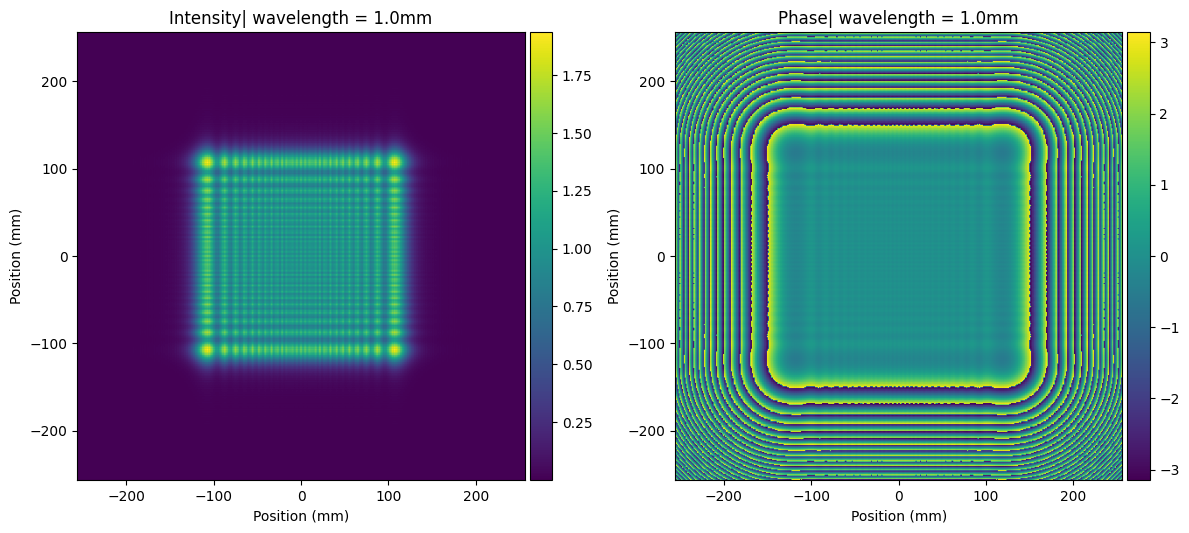

In [22]:
field_propagated.visualize(figsize=(12, 12), wavelength=1 * mm, flag_axis=True, intensity=True)